In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Современные методы анализа данных\titanic\pusan_boat.csv', sep=',')
df.tail()
#Всего 1310 наблюдений. Присутствуют пропущенные значения, которые могут испортить результаты исследования

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Функция расчета количества и процента пропущенных значений
def missing_values_table(df):
        # Общее количество пропущенных значений
        mis_val = df.isnull().sum()
        
        # Процент пропущенных значений
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Сводная таблица результатов
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Переименование колонок
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Пропушенные значения', 1 : '% от общего числа значений'})
        
        # Сортировка таблицы по проценту отсутствующих значений (по убыванию) (таблица итогов)
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% от общего числа значений', ascending=False).round(1)
        
        # Вывод по итоговой таблице
        print ("Датафрейм содержит " + str(df.shape[1]) + " столбцов.\n"      
            "Существует " + str(mis_val_table_ren_columns.shape[0]) +
              " столбов, в которых отсутствуют значения.")

        return mis_val_table_ren_columns

In [4]:
missing_values_table(df)

Датафрейм содержит 14 столбцов.
Существует 14 столбов, в которых отсутствуют значения.


,Пропушенные значения,% от общего числа значений
body,1189,90.8
cabin,1015,77.5
boat,824,62.9
home.dest,565,43.1
age,264,20.2
embarked,3,0.2
fare,2,0.2
pclass,1,0.1
survived,1,0.1
name,1,0.1


Столбцы body, cabin, boat, home.dest имеют большой процент пропущенных значений и не несут особо содержательной нагрузки для исследования. Удалим эти столбцы, а столбец age заменим средними значениями. Пропущенные значения из оставшейся группы столбцов удалим (такой маленький процент пропущенных значений при удалении не повлияет на результаты исследования).

In [5]:
df = df.drop(columns=['body', 'cabin', 'boat', 'home.dest']) #удаление указанных колонок

ShapiroResult(statistic=0.9795483946800232, pvalue=5.752113022006178e-11)

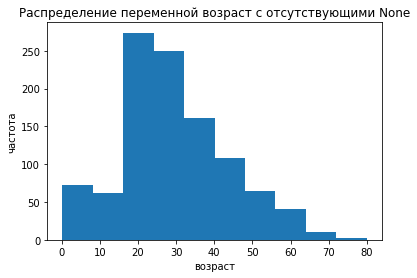

In [6]:
#Распределение переменной возраст (отсутствуют пропущенные значения)
df_age = np.array(df.age)
df_age = df_age[~np.isnan(df_age)]
plt.hist(df_age)
plt.title('Распределение переменной возраст с отсутствующими None')
plt.xlabel('возраст')
plt.ylabel('частота')
#Визуально распределения нельзя назвать нормальным.
#Проверим также наше предположение с помощью Критерия Шапиро-Уилка (модуль stats, библиотека scipy)
stats.shapiro(df_age)
# pvalue < уровня значимости 0,05, а это значит что распределение отличается от нормального
# Посмотрим как поведет себя распределение, если мы добавим на место пропущенных значений средние

In [7]:
df['age'].fillna((df['age'].mean()), inplace=True) # заменили пропущенные значения средними в столбце age

Text(0, 0.5, 'частота')

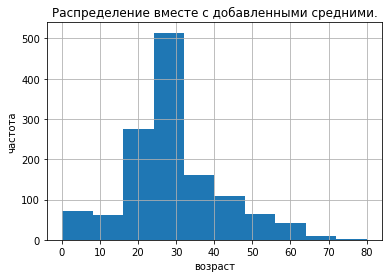

In [8]:
df.age.hist() # Распределение вместе с добавленными средними.
plt.title('Распределение вместе с добавленными средними.')
plt.xlabel('возраст')
plt.ylabel('частота')

Конечно, распределение по прежнему не является нормальным, но мы избавились от пропущенных значений. Процент пропущенных значений хоть и не является очень большим, но удаление этих значений всеравно может исказить результаты исследования

In [9]:
df.dropna(inplace=True) #удалили оставшиеся пропущенные значения

In [10]:
# Пропущенных значений не осалось
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   name      1306 non-null   object 
 3   sex       1306 non-null   object 
 4   age       1306 non-null   float64
 5   sibsp     1306 non-null   float64
 6   parch     1306 non-null   float64
 7   ticket    1306 non-null   object 
 8   fare      1306 non-null   float64
 9   embarked  1306 non-null   object 
dtypes: float64(6), object(4)
memory usage: 112.2+ KB


<AxesSubplot:xlabel='sex', ylabel='count'>

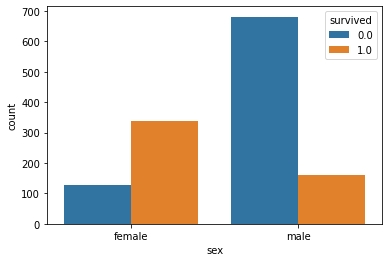

In [11]:
#Посмотрим соотношение погибших и выживших в зависимости от пола
sns.countplot(x = 'sex', hue = 'survived', data=df)
#Выживших женщин больше чем мужчин

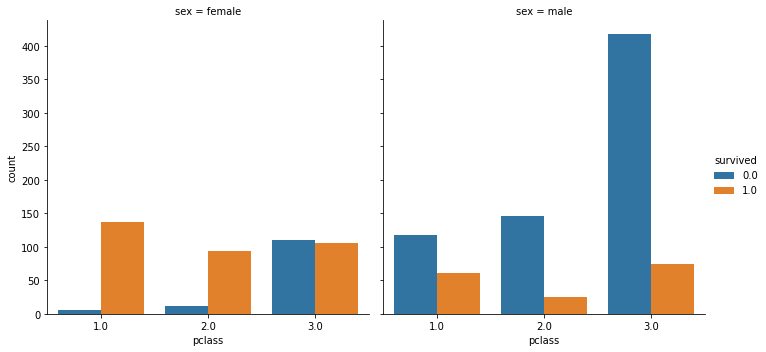

In [12]:
#Построим соотношение погибших и выживших по классам, и еще разделим по полу
sns.catplot(x = 'pclass', hue = 'survived', col='sex', data=df, kind = 'count', height=5)
# Можно заметить, что у женщин с увеличением класса увеличивается шанс выжить
#У мужчин, чем выше класс, тем меньше умерших. Значения выживших пассажиров в зависимости от класса у мужчин имеют минимум во 2 классе.

In [13]:
# Посмотрим как отличается средний возраст пассажиров в зависимости от класса обслуживания
for i in df['pclass'].unique():
    for j in df['sex'].unique():
        print('Средний возраст {} {} класса равен {};'.format(j, i, (df['age'][(df.pclass == i) & (df.sex == j)]).mean()))

Средний возраст female 1.0 класса равен 36.300651265047264;
Средний возраст male 1.0 класса равен 39.2854104265251;
Средний возраст female 2.0 класса равен 27.566604750351743;
Средний возраст male 2.0 класса равен 30.74437455357642;
Средний возраст female 3.0 класса равен 24.465552355534307;
Средний возраст male 3.0 класса равен 27.039058271930234;


Заметно, что средний возраст людей 1 класса и среди мужчин и среди женщин больше чем у остальных классов. Это объясняется тем фактом, что билеты 1 класса могли купить более состоятельные граждане.

<AxesSubplot:xlabel='new_column', ylabel='count'>

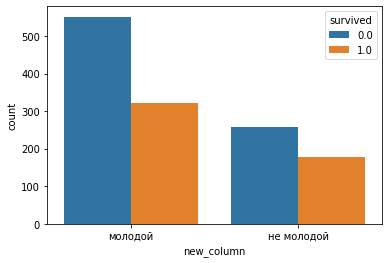

In [14]:
#Посмотрим как факт выживания зависит от возраста пассажира
# Условно разделим на молодой/не молодой по границе - 30 лет
df['new_column'] = np.where(df.age <= 30, 'молодой', 'не молодой') #Создадим новую колонку в нашей таблице df

sns.countplot(x = 'new_column', hue = 'survived', data=df)

По графику заметно, что (условно) не молодые выживали чаще. "Условно", так как мы сами выбрали границу для разделения

### Логистическая регрессия

In [15]:
# Создадим новую переменую и определим мужчин как 1, а женщин как 0
# Переменная пол будет одним из предикторов и она не может быть качественной
# Модель просто будет выдавать ошибку, если на место предикторов поставить качественную переменную
df['col_sex'] = np.where(df['sex'] == 'female', 0, 1)

Построим логистическую регрессию. Зависимой переменной будет являться факт выживаемости пассажира (выжил/не выжил). Независимыми переменными (предикторами) будут пол человека, его возраст, класс билета, стоимость билета.

In [16]:
#Переменные pclass и col_sex являются категориальными. Но сам Python это не понимает, поэтому обозначим это "вручную".
df['pclass'] = df['pclass'].astype('category')
df['col_sex'] = df['col_sex'].astype('category')

result = smf.logit(formula = 'survived ~ col_sex + age + pclass  + fare', data = df).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.469606
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                 1306
Model:                          Logit   Df Residuals:                     1300
Method:                           MLE   Df Model:                            5
Date:                Sat, 30 Oct 2021   Pseudo R-squ.:                  0.2935
Time:                        13:10:18   Log-Likelihood:                -613.31
converged:                       True   LL-Null:                       -868.10
Covariance Type:            nonrobust   LLR p-value:                6.768e-108
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.3007      0.340      9.708      0.000       2.634       3.967
col_sex[T.1]     -2.4872      0.150    -16.606      0.000      -2.781      -2.194
pclass[T.2.0]    -1.1561      0.234     -4.937      0.000      -1.615      -0.697
pclass[T.3.0]    -2.1123      0.228     -9.272      0.000      -2.559      -1.666
age              -0.0324      0.006     -5.310      0.000      -0.044      -0.020
fare              0.0005      0.002      0.285      0.776      -0.003       0.004
=================================================================================
"""

Показатель псевдо-R-квадрат равняется 0.2935. Это показывает, что модель объясняет приблизительно 30% отклонений. Конечно, модель получилась не сильно хорошая, но объяснения по ней сделать можно. 

Log-Likelihood в случае построения только 1 модели не несет никакой информации. Будет полезен только в случае построения и сравнения нескольких моделей. LL-null также используются для сравнения моделей и чем выше этот показатель тем лучше. LLR p-value < 0,05. Это говорит, что та модель, которую мы предположили, лучше чем отсуттвие модели вообще. Это аналог F-статистики для модели линейной регрессии.

P значения коэффициентов показывают, что значимыми являются переменные кроме переменной fare. Скорее всего это произошло из-за корреляции между классом и ценой билета. Ведь с увеличением класса цена билета тоже увеличивается, а мультиколлинеарность(корреляция между зависимыми переменными) в моделях регрессии недопустима. Но если мы переменную fare выкинем, то наш R квадрат никак не изменется. Оставим, но не будем придавать ей никакого значения. 

In [17]:
np.corrcoef(df.fare, df.pclass) # Корреляция между fare и pclass

array([[ 1.        , -0.55786103],
       [-0.55786103,  1.        ]])

Statmodels так оценивает категориальные коэффициенты регрессии, что берет какую-то одну категорию среди кат. переменных и делает ее референтной. В моем случае референтными категориями являются женщины первого класса. Это показатель Intercept (свободный член регрессии). 

Выводы по модели:
    
1) За каждую еденицу возраста шансы выжить понижаются;

2) col_sex[T.1] - логарифм отношения шансов для мужчин в первом классе и женщин в первом классе (Показатель говорит нам, что шансы выжить для мужчин в первом классе ниже чем у женщин в первом классе)

3) pclass[T.2.0] - логарифм отношения шансов для женщин во 2 классе и женщин в первом классе (У женщин во 2 классе шансы выжить ниже по сравнению с женщинами в 1 классе)

4) pclass[T.3.0] - логарифм отношения шансов для женщин в 3 классе и женщин в первом классе (У женщин в 3 классе шансы выжить ниже по сравнению с женщинами в 1 классе)